<a href="https://colab.research.google.com/github/duffls/tf_course/blob/main/03_keras_DNN_overfit_cau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

from sklearn.datasets import make_moons

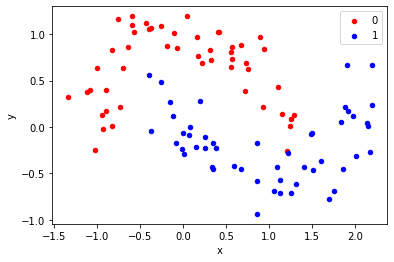

In [ ]:
x, y = make_moons(n_samples=100, noise=0.2, random_state=555)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()

grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

split_index = int(len(x)*0.3)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

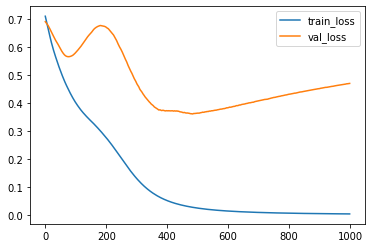

In [ ]:
model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

base_history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)

plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


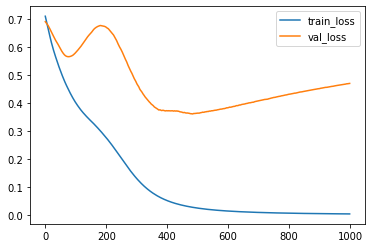

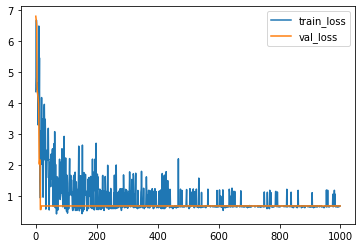

In [ ]:
# DropOut
from tensorflow.keras.layers import Dropout

model = Sequential()
#model.add(Input(2))
model.add(Dense(20, activation='relu', input_shape=(2,)))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)

plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

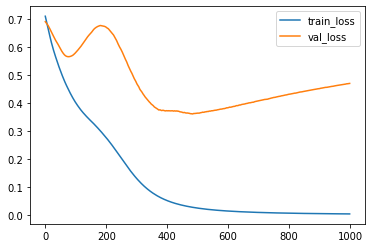

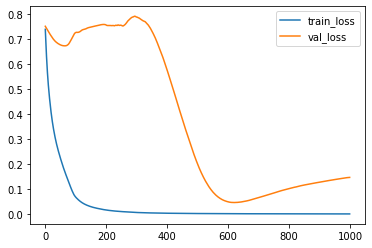

In [ ]:
# BatchNormalization
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(2,)))
model.add(BatchNormalization())
model.add(Dense(20, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)

plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

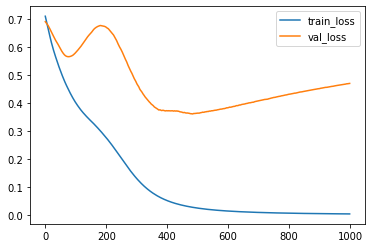

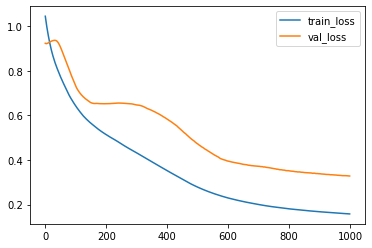

In [ ]:
# Regularization
# Dense 생성시 kernel_regularization. bias_regularization 으로 설정, l1, l1_l1, l2

from tensorflow.keras.regularizers import l1, l2, L1L2

model = Sequential()
model.add(Dense(20, activation='relu', kernel_regularizer=l2(), input_shape=(2,)))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)

plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

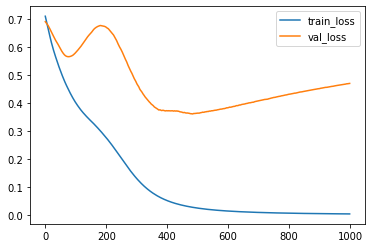

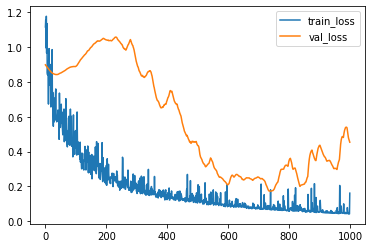

In [ ]:
# All in one
model = Sequential()
model.add(Dense(20, activation='relu', kernel_regularizer=l2(), input_shape=(2,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)

plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

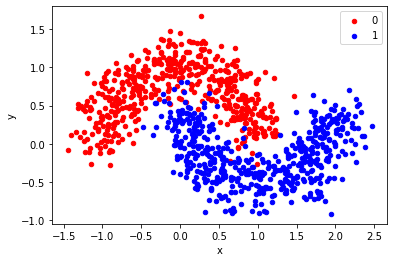

In [ ]:
# 데이터 10배
x, y = make_moons(n_samples=100*10, noise=0.2, random_state=555)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

split_index = int(len(x)*0.3)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


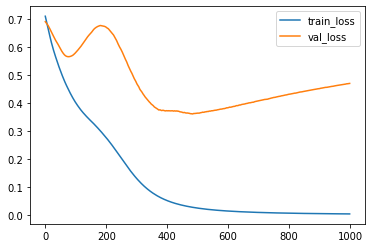

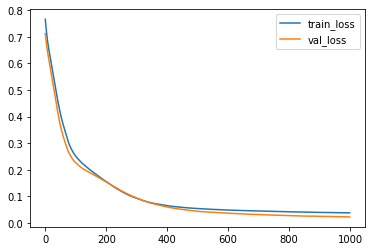

In [ ]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(2,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)

plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()